#**Ağ Anomalisi Tespiti**

# Hesaplarımız :
###Github -> https://github.com/meryemarpaci/YZVM-Machine-Learning-Project
###Trello -> https://trello.com/b/q8WCnXK9/yzvm-ml-project

#Gerekli Kütüphaneler

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
!pip install klib
import klib as kl
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import itertools
from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.tree  import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
!pip install catboost
from catboost import CatBoostClassifier
!pip install xgboost
import xgboost as xgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


# Veri Setine Genel Bakış

In [2]:
df = pd.read_csv("/content/Train_data.csv")

In [3]:
df.shape

(25193, 42)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [5]:
df.dtypes

duration                       float64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

## Bazı Sütunların Özellikleri:

* Duration:  Bağlantı süresinin uzunluğu
* Protocol_type: Bağlantıda kullanılan protokol
* Service: Kullanılan hedef ağ hizmeti
* Flag: Bağlantı durumu - Normal veya Hata
* Src_bytes: Tek bağlantıda kaynaktan hedefe aktarılan veri baytlarının sayısı
* Dst_bytes: Tek bağlantıda hedeften kaynağa aktarılan veri baytlarının sayısı
* Land: kaynak ve hedef IP adresleri ve port numaraları eşitse, bu değişken 1 değerini alır, aksi takdirde 0
* Wrong_fragment: Bu bağlantıdaki toplam yanlış parça sayısı
* Urgent: Bu bağlantıdaki acil paketlerin sayısı. Acil paketler, acil biti etkinleştirilmiş paketlerdir


In [6]:
df.isnull().sum()

duration                       1
protocol_type                  1
service                        1
flag                           1
src_bytes                      1
dst_bytes                      1
land                           1
wrong_fragment                 1
urgent                         1
hot                            1
num_failed_logins              1
logged_in                      1
num_compromised                1
root_shell                     1
su_attempted                   1
num_root                       1
num_file_creations             1
num_shells                     1
num_access_files               1
num_outbound_cmds              1
is_host_login                  1
is_guest_login                 1
count                          1
srv_count                      1
serror_rate                    1
srv_serror_rate                1
rerror_rate                    1
srv_rerror_rate                1
same_srv_rate                  1
diff_srv_rate                  1
srv_diff_h

In [7]:
null_satir = df[df.isnull().any(axis=1)]
null_satir
df = df.drop(null_satir.index)

167. satırdaki bütün sütunların boş değerlere sahip olduğu görüldü.

#Görselleştirme

In [8]:
df["class"].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

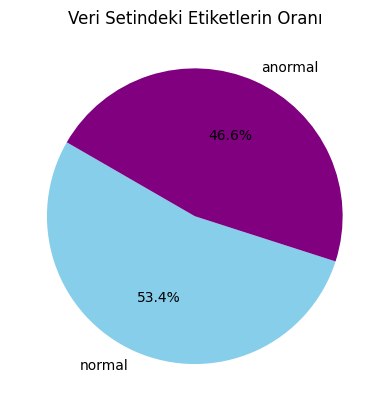

<Figure size 640x480 with 0 Axes>

In [9]:
service_counts = df['class'].value_counts(ascending=False).values
plt.pie(service_counts, labels=["normal","anormal"], startangle=150,autopct='%1.1f%%', colors=['skyblue', 'purple']);
plt.title("Veri Setindeki Etiketlerin Oranı")
plt.figure(dpi=100)
plt.show()



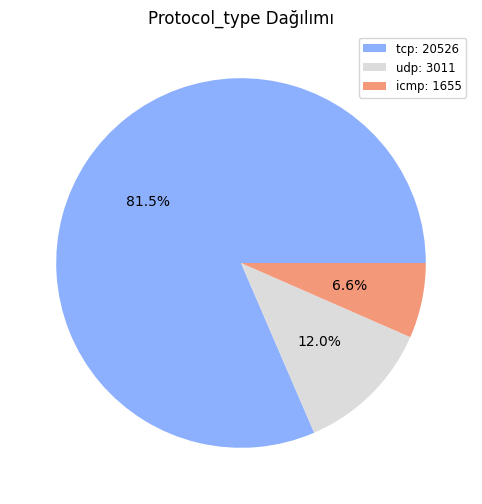

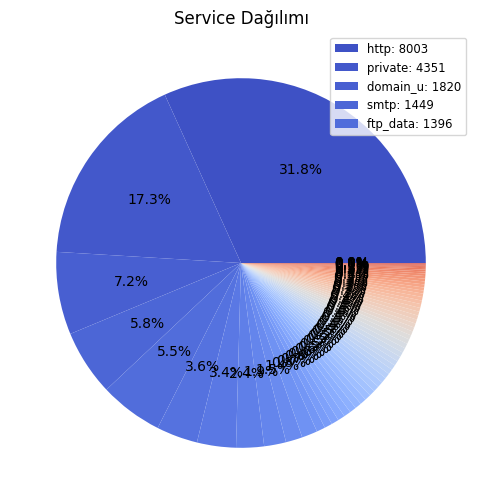

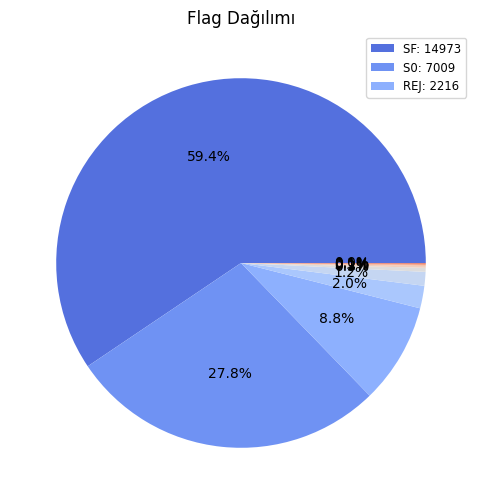

In [10]:
threshold_percentage = 5  # Eşik yüzdesi
for category in ['protocol_type', 'service', 'flag']:
    abs_values = df[category].value_counts().values
    labels = df[category].value_counts().index
    colors = sns.color_palette("coolwarm", len(abs_values))

    plt.figure(figsize=(8, 6))
    pie = plt.pie(abs_values, labels=None, autopct='%1.1f%%', colors=colors)
    plt.title(f"{category.capitalize()} Dağılımı")

    # Renk eşleme tablosunu oluştur
    legend_labels = [f'{label}: {value}' for label, value in zip(labels, abs_values) if value / sum(abs_values) * 100 > threshold_percentage]
    plt.legend(legend_labels, loc='best', fontsize='small')

    plt.show()


##Kategorik Değişkenler İçin Uniq Değerler

In [11]:
deger = ['protocol_type', 'service', 'flag']
for a in deger:
    print(a,"İçin Uniq Değerler ")
    unique = df[a].unique()
    print(unique)
    print(a," için Uniq Degerlerin Sayısı:", len(unique),"\n")

protocol_type İçin Uniq Değerler 
['tcp' 'udp' 'icmp']
protocol_type  için Uniq Degerlerin Sayısı: 3 

service İçin Uniq Değerler 
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
service  için Uniq Degerlerin Sayısı: 66 

flag İçin Uniq Değerler 
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
flag  için Uniq Degerlerin Sayısı: 11 



#Verileri Ölçeklendirme

In [12]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

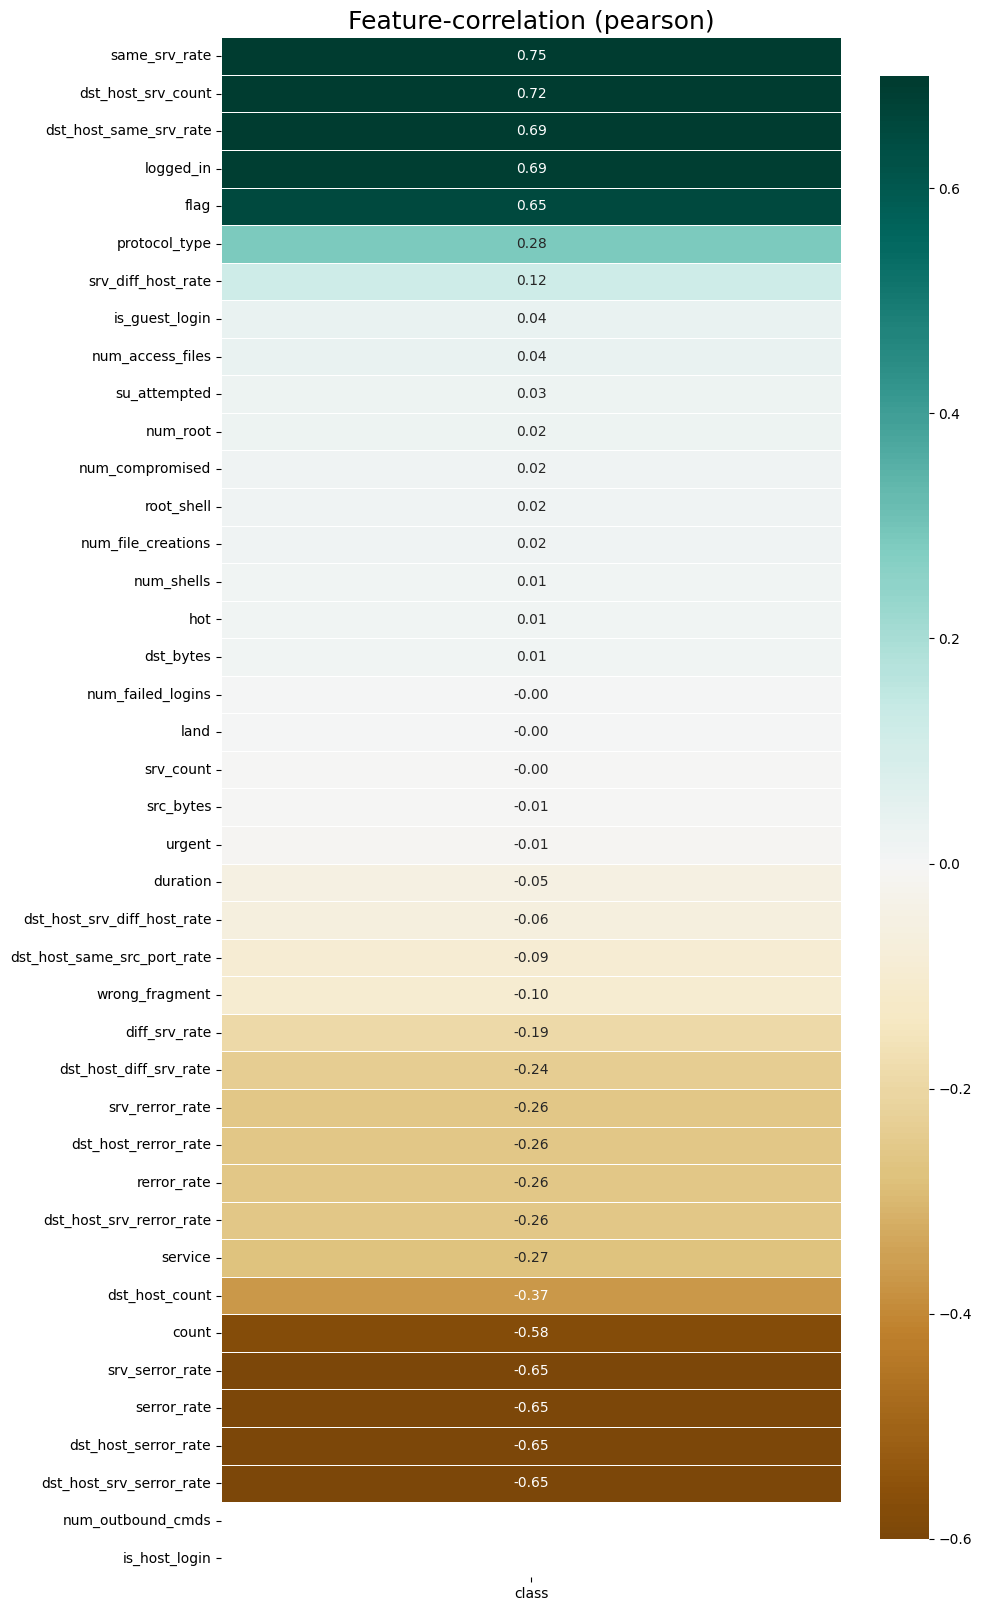

In [13]:
kl.corr_plot(df,figsize=(10,20),target='class')

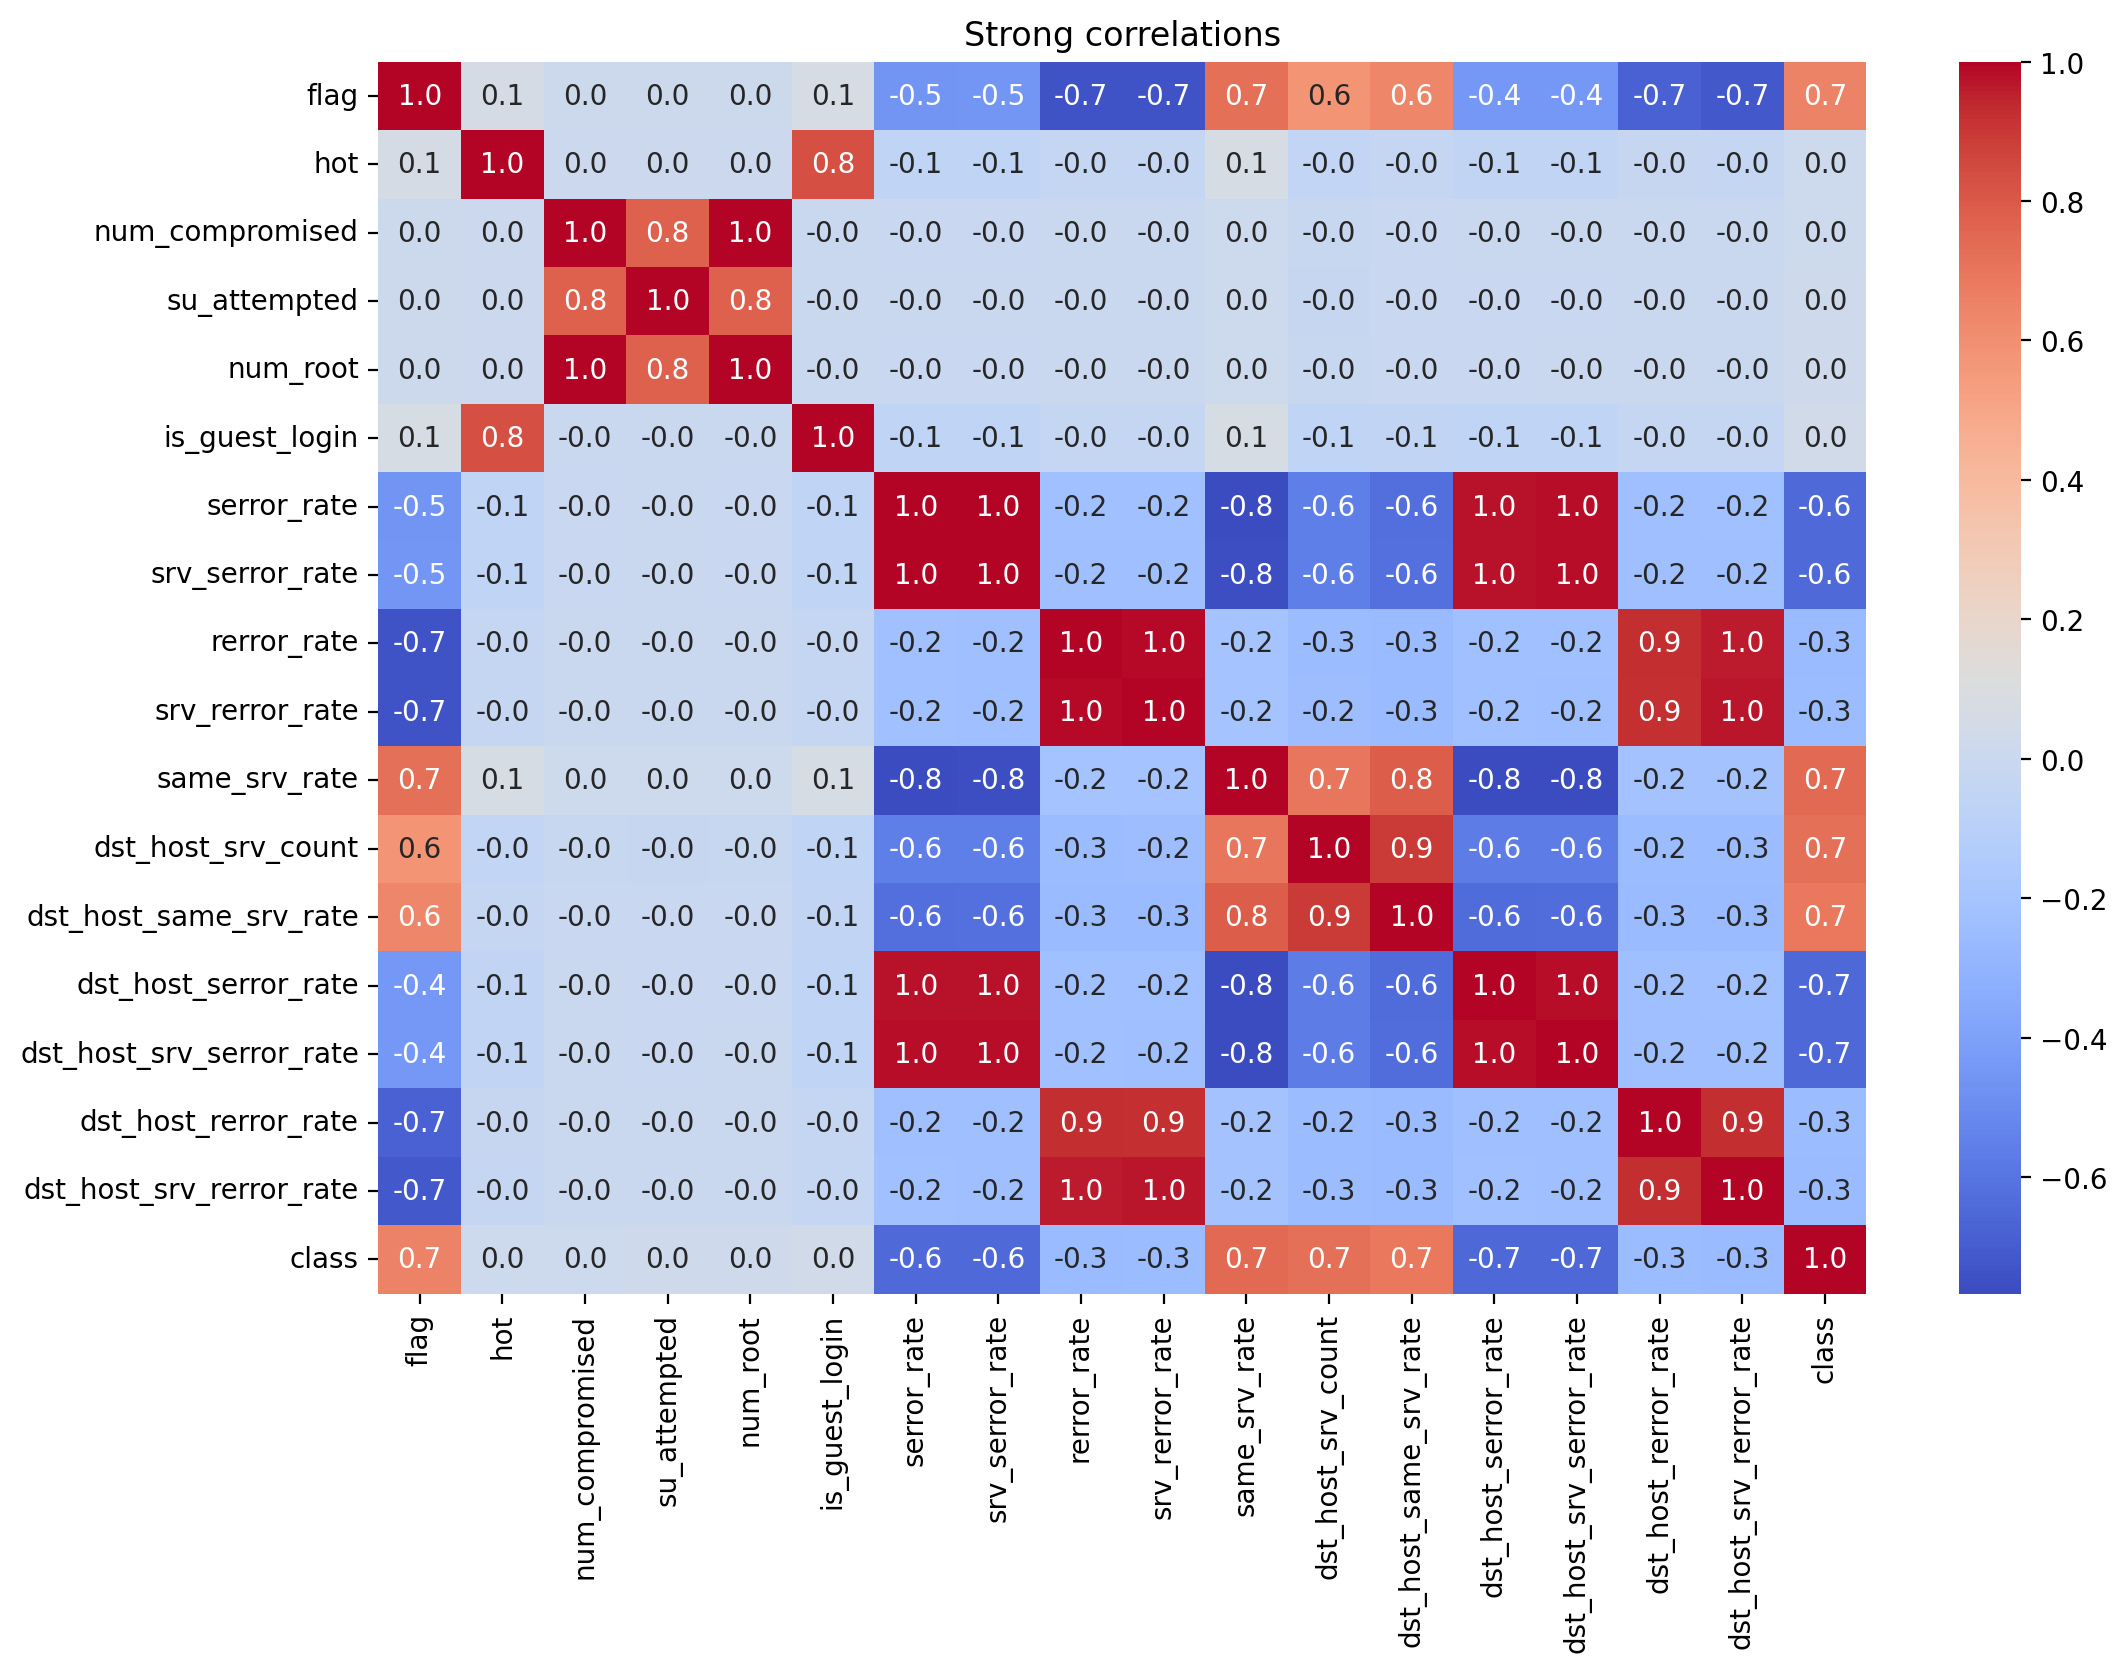

In [14]:

corr_matrix = df.corr()
threshold = 0.7

mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()


In [15]:
X=df.drop('class',axis=1)
y = df['class']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=230)

                             importance
feature                                
src_bytes                         0.184
dst_bytes                         0.124
flag                              0.085
same_srv_rate                     0.080
diff_srv_rate                     0.075
dst_host_srv_count                0.043
dst_host_same_srv_rate            0.042
dst_host_srv_serror_rate          0.036
dst_host_serror_rate              0.033
protocol_type                     0.033
dst_host_same_src_port_rate       0.027
logged_in                         0.026
count                             0.024
service                           0.022
dst_host_diff_srv_rate            0.022
srv_count                         0.019
serror_rate                       0.019
dst_host_srv_diff_host_rate       0.019
dst_host_count                    0.015
dst_host_rerror_rate              0.015
srv_serror_rate                   0.012
dst_host_srv_rerror_rate          0.011
hot                               0.009


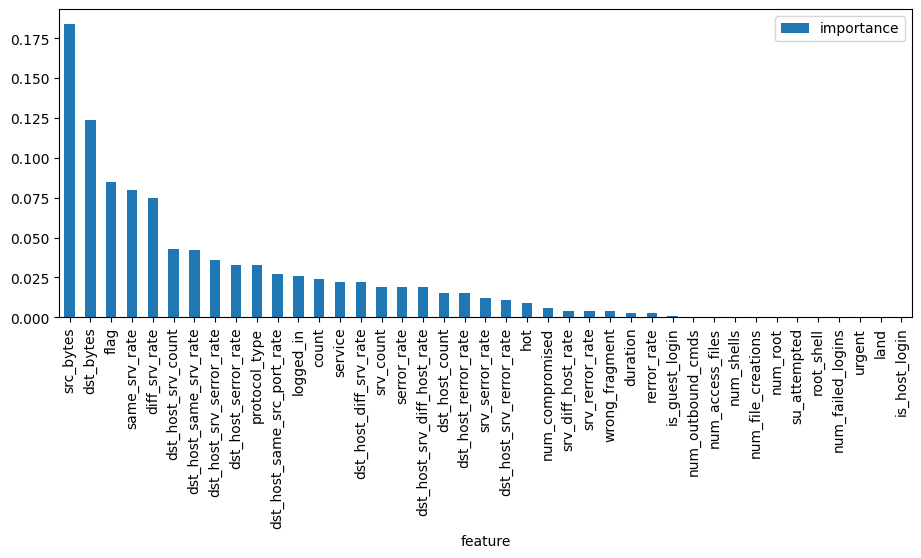

In [17]:

rfc = RandomForestClassifier();


rfc.fit(x_train, y_train);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


In [ ]:
"""
src_bytes
dst_bytes
same_srv_rate
dst_host_same_srv_rate
diff_srv_rate
flag
dst_host_diff_srv_rate
logged_in
count
dst_host_srv_count
protocol_type
dst_host_same_src_port_rate
service
"""

In [18]:
x = df[['src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_same_srv_rate', 'diff_srv_rate', 'flag', 'dst_host_diff_srv_rate', 'logged_in', 'count', 'dst_host_srv_count', 'protocol_type', 'dst_host_same_src_port_rate', 'service']]

x.info()

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=230)

<class 'pandas.core.frame.DataFrame'>
Index: 25192 entries, 0 to 25192
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_bytes                    25192 non-null  float64
 1   dst_bytes                    25192 non-null  float64
 2   same_srv_rate                25192 non-null  float64
 3   dst_host_same_srv_rate       25192 non-null  float64
 4   diff_srv_rate                25192 non-null  float64
 5   flag                         25192 non-null  int64  
 6   dst_host_diff_srv_rate       25192 non-null  float64
 7   logged_in                    25192 non-null  float64
 8   count                        25192 non-null  float64
 9   dst_host_srv_count           25192 non-null  float64
 10  protocol_type                25192 non-null  int64  
 11  dst_host_same_src_port_rate  25192 non-null  float64
 12  service                      25192 non-null  int64  
dtypes: float64(10), int64

##Modeller

In [19]:
NB = GaussianNB()

NB.fit(x_train, y_train)

GaussianNB()

In [20]:
pred_nb = NB.predict(x_test)

accuracy_nb = accuracy_score(y_test, pred_nb)
print("Accuracy:", accuracy_nb)

classi_report = classification_report(y_test, pred_nb)
print("Classification Report:\n", classi_report)

Accuracy: 0.8636634252827942
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      2385
           1       0.86      0.88      0.87      2654

    accuracy                           0.86      5039
   macro avg       0.86      0.86      0.86      5039
weighted avg       0.86      0.86      0.86      5039



In [ ]:
"""
LR = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

#en iyi max_iter=1000
print("En iyi parametreler:", grid_search.best_params_)
"""

In [21]:
LR = LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='newton-cg')
LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg')

In [22]:
pred_lr = LR.predict(x_test)

accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy:", accuracy_lr)

classi_report = classification_report(y_test, pred_lr)
print("Classification Report:\n", classi_report)

Accuracy: 0.9378845008930343
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      2385
           1       0.93      0.95      0.94      2654

    accuracy                           0.94      5039
   macro avg       0.94      0.94      0.94      5039
weighted avg       0.94      0.94      0.94      5039



In [ ]:
"""
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("En iyi parametreler: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))
"""

In [23]:
rf = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=100)


rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Doğruluk (Accuracy):", accuracy_rf)

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Doğruluk (Accuracy): 0.9956340543758683

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2385
           1       0.99      1.00      1.00      2654

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [24]:

RMSE = []
for k in range(20):
  k = k+1
  KNN=KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
  y_pred = KNN.predict(x_test)
  rmse=np.sqrt(mean_squared_error(y_test, y_pred))
  RMSE.append(rmse)
  print("k =",k,"icin RMSE degeri :",rmse)


k = 1 icin RMSE degeri : 0.07454299475522029
k = 2 icin RMSE degeri : 0.07319976771310568
k = 3 icin RMSE degeri : 0.07198474942550932
k = 4 icin RMSE degeri : 0.07512310463083163
k = 5 icin RMSE degeri : 0.07858643990796514
k = 6 icin RMSE degeri : 0.08210881775068744
k = 7 icin RMSE degeri : 0.08497779393350992
k = 8 icin RMSE degeri : 0.08799279341398471
k = 9 icin RMSE degeri : 0.09040622440314905
k = 10 icin RMSE degeri : 0.09313613770634112
k = 11 icin RMSE degeri : 0.09538151550495588
k = 12 icin RMSE degeri : 0.0974159531037897
k = 13 icin RMSE degeri : 0.09978893661119918
k = 14 icin RMSE degeri : 0.10194316357985894
k = 15 icin RMSE degeri : 0.10322146744411027
k = 16 icin RMSE degeri : 0.10485196616417713
k = 17 icin RMSE degeri : 0.10698444679674635
k = 18 icin RMSE degeri : 0.10806784693881995
k = 19 icin RMSE degeri : 0.10921544818125219
k = 20 icin RMSE degeri : 0.1104326766255346


In [25]:
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [26]:
y_pred = KNN.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

classi_report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classi_report)

accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy Değeri:", accuracy_knn)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2385
           1       1.00      0.99      0.99      2654

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

Accuracy Değeri: 0.9934510815638024


In [27]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [29]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [30]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

[I 2024-06-09 08:54:14,432] A new study created in memory with name: no-name-5f8f5f3e-6edb-4234-9f32-a832a59e8be2
[I 2024-06-09 08:54:14,478] Trial 0 finished with value: 0.9960309585235165 and parameters: {'dt_max_depth': 21, 'dt_max_features': 7}. Best is trial 0 with value: 0.9960309585235165.
[I 2024-06-09 08:54:14,519] Trial 1 finished with value: 0.9958325064496923 and parameters: {'dt_max_depth': 25, 'dt_max_features': 6}. Best is trial 0 with value: 0.9960309585235165.
[I 2024-06-09 08:54:14,570] Trial 2 finished with value: 0.9954356023020441 and parameters: {'dt_max_depth': 30, 'dt_max_features': 10}. Best is trial 0 with value: 0.9960309585235165.
[I 2024-06-09 08:54:14,603] Trial 3 finished with value: 0.993054177416154 and parameters: {'dt_max_depth': 21, 'dt_max_features': 4}. Best is trial 0 with value: 0.9960309585235165.
[I 2024-06-09 08:54:14,646] Trial 4 finished with value: 0.9958325064496923 and parameters: {'dt_max_depth': 31, 'dt_max_features': 8}. Best is trial 

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9960309585235165], datetime_start=datetime.datetime(2024, 6, 9, 8, 54, 14, 436578), datetime_complete=datetime.datetime(2024, 6, 9, 8, 54, 14, 478242), params={'dt_max_depth': 21, 'dt_max_features': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=0, value=None)


In [31]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

pred_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, pred_dt)
print("Accuracy:", accuracy_dt)

classi_report = classification_report(y_test, pred_dt)
print("Classification Report:\n", classi_report)

Accuracy: 0.9940464377852749
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2385
           1       0.99      1.00      0.99      2654

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



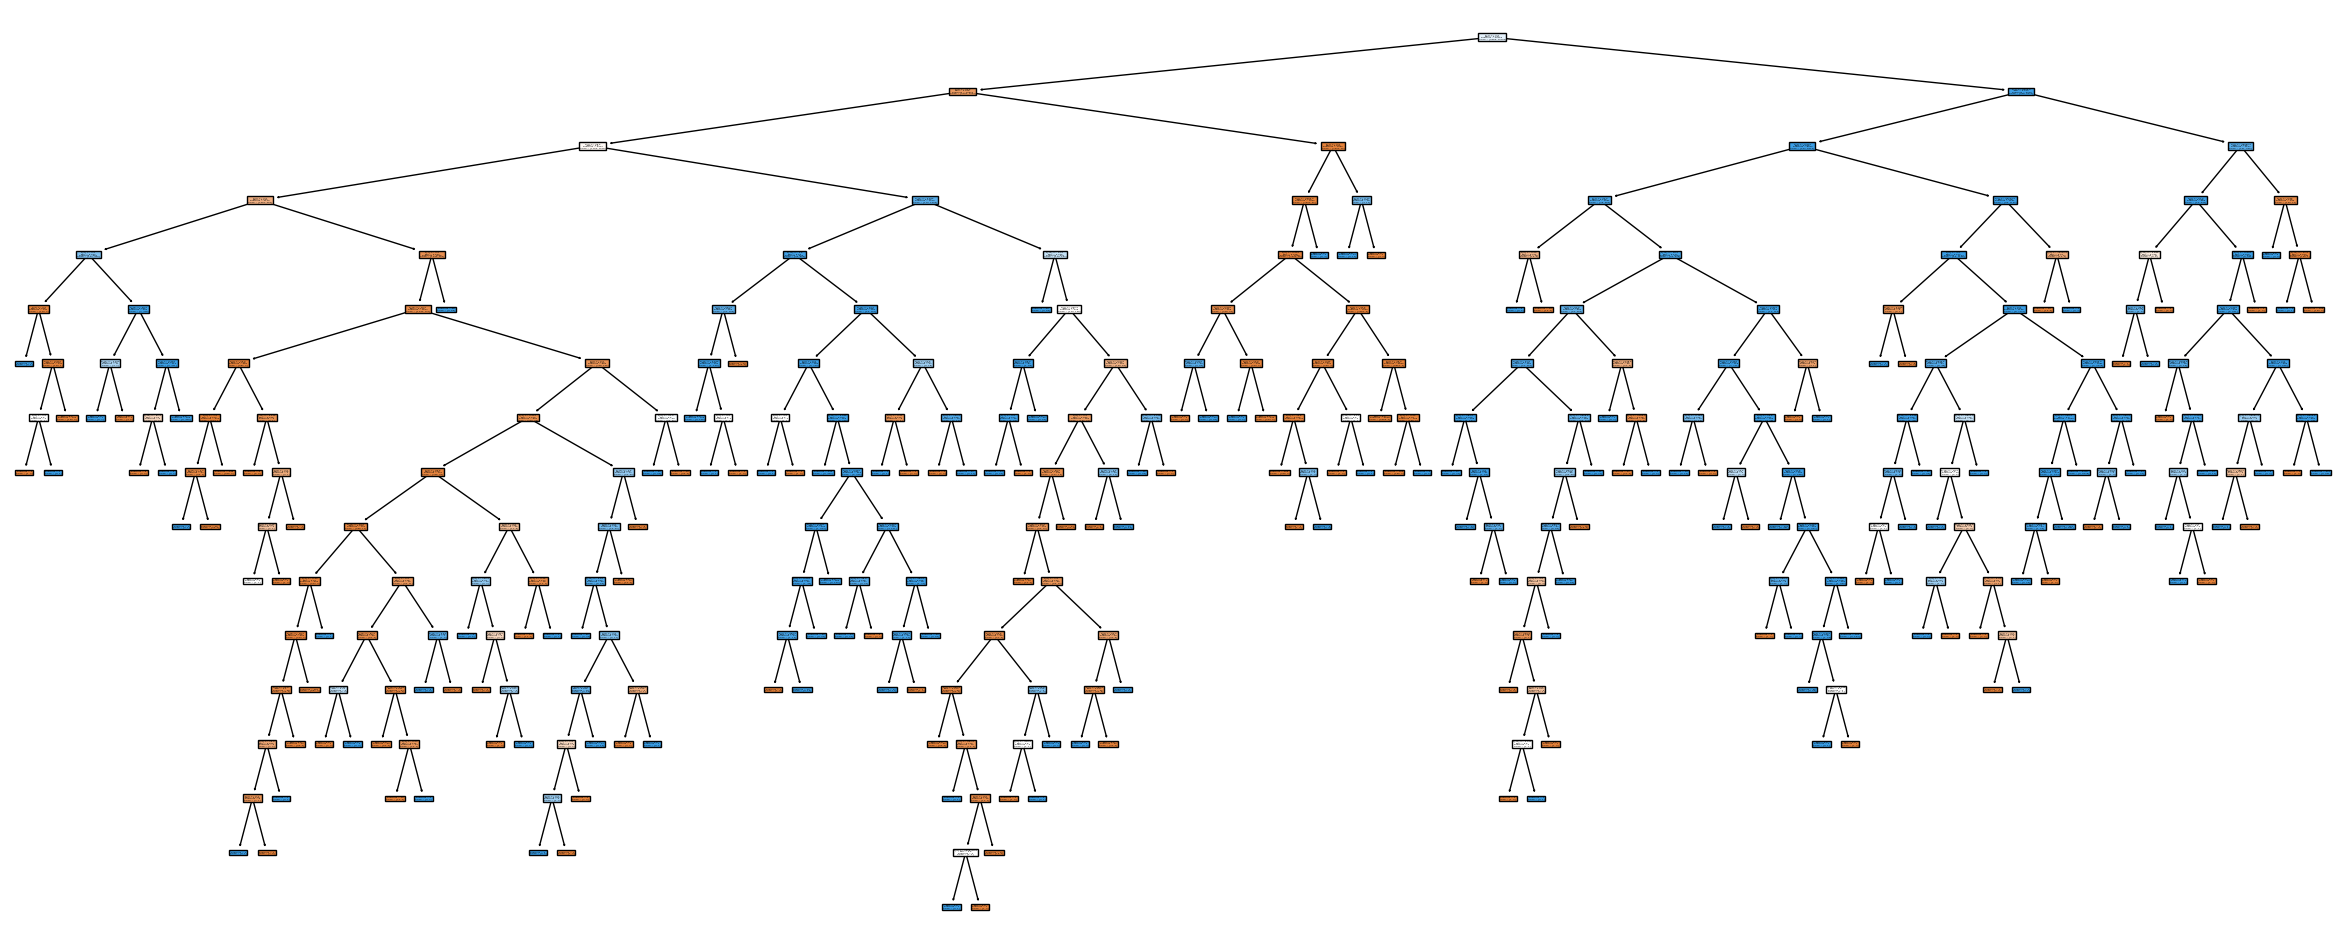

In [32]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

In [ ]:
"""
rfe = RFE(rfc, n_features_to_select=17)
rfe = rfe.fit(x_train, y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
select_features = [v for i, v in feature_map if i==True]

select_features
"""


In [34]:
CB = CatBoostClassifier()
CB.fit(x_train, y_train)
y_pred = CB.predict(x_test)

Learning rate set to 0.037144
0:	learn: 0.6146720	total: 87.7ms	remaining: 1m 27s
1:	learn: 0.5500423	total: 108ms	remaining: 53.8s
2:	learn: 0.4861634	total: 128ms	remaining: 42.4s
3:	learn: 0.4162869	total: 147ms	remaining: 36.6s
4:	learn: 0.3688799	total: 176ms	remaining: 35s
5:	learn: 0.3292037	total: 201ms	remaining: 33.3s
6:	learn: 0.2921397	total: 220ms	remaining: 31.2s
7:	learn: 0.2645475	total: 237ms	remaining: 29.3s
8:	learn: 0.2315450	total: 257ms	remaining: 28.3s
9:	learn: 0.2085308	total: 267ms	remaining: 26.5s
10:	learn: 0.1914685	total: 286ms	remaining: 25.7s
11:	learn: 0.1712890	total: 303ms	remaining: 25s
12:	learn: 0.1563026	total: 325ms	remaining: 24.7s
13:	learn: 0.1436520	total: 345ms	remaining: 24.3s
14:	learn: 0.1306003	total: 366ms	remaining: 24s
15:	learn: 0.1195126	total: 386ms	remaining: 23.7s
16:	learn: 0.1099708	total: 408ms	remaining: 23.6s
17:	learn: 0.1043403	total: 431ms	remaining: 23.5s
18:	learn: 0.0968665	total: 453ms	remaining: 23.4s
19:	learn: 0.09

In [35]:
accuracy_cb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_cb)

classi_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classi_report)

Accuracy: 0.9950386981543957
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2385
           1       0.99      1.00      1.00      2654

    accuracy                           1.00      5039
   macro avg       1.00      0.99      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [ ]:
"""
XGB = xgb.XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
"""

In [36]:
XGB = xgb.XGBClassifier(colsample_bytree=0.7,
                              learning_rate=0.1,
                              max_depth=7,
                              min_child_weight=1,
                              n_estimators=200,
                              subsample=1.0)

XGB.fit(x_train, y_train)
pred_xgb = XGB.predict(x_test)

accuracy_xgb = accuracy_score(y_test, pred_xgb)
print("Accuracy:", accuracy_xgb)

classi_report = classification_report(y_test, pred_xgb)
print("Classification Report:\n", classi_report)


Accuracy: 0.9960309585235165
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2385
           1       0.99      1.00      1.00      2654

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



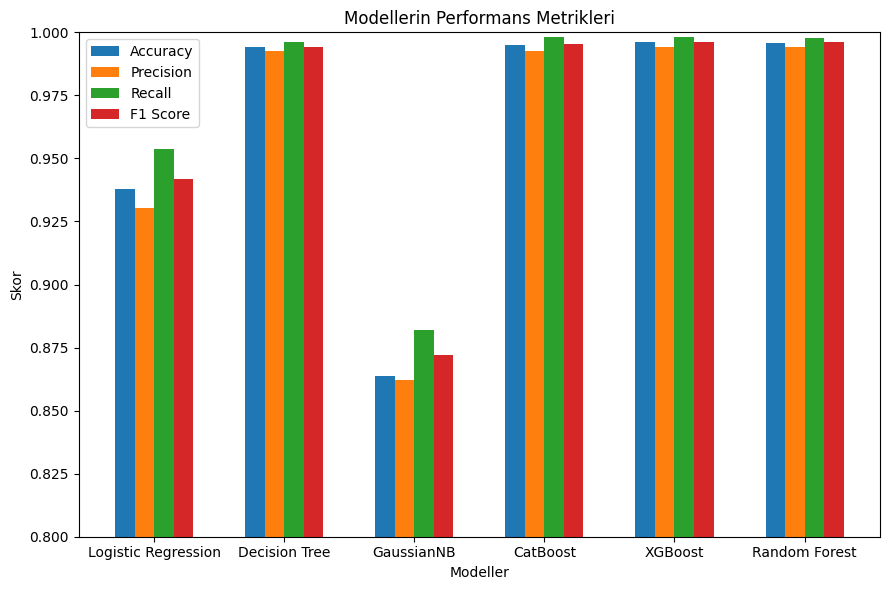

In [37]:

predictions = {
    'Logistic Regression': LR.predict_proba(x_test)[:,1],
    'Decision Tree': dt.predict_proba(x_test)[:,1],
    'GaussianNB': NB.predict_proba(x_test)[:,1],
    'CatBoost': CB.predict_proba(x_test)[:,1],
    'XGBoost': XGB.predict_proba(x_test)[:,1],
    'Random Forest': rf.predict_proba(x_test)[:,1]

}
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

models = list(predictions.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {metric: {model: [] for model in models} for metric in metrics}

for model in models:
    y_pred = np.where(predictions[model] >= 0.5, 1, 0)
    accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred)
    results['Accuracy'][model] = accuracy
    results['Precision'][model] = precision
    results['Recall'][model] = recall
    results['F1 Score'][model] = f1

plt.figure(figsize=(9, 6))
x = np.arange(len(models))

width = 0.15
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, [results[metric][model] for model in models], width=width, label=metric)

plt.xlabel('Modeller')
plt.ylabel('Skor')
plt.title('Modellerin Performans Metrikleri')
plt.xticks(x + width * (len(metrics) - 1) / 2, models)
plt.ylim(0.8, 1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


##ROC Eğrisi

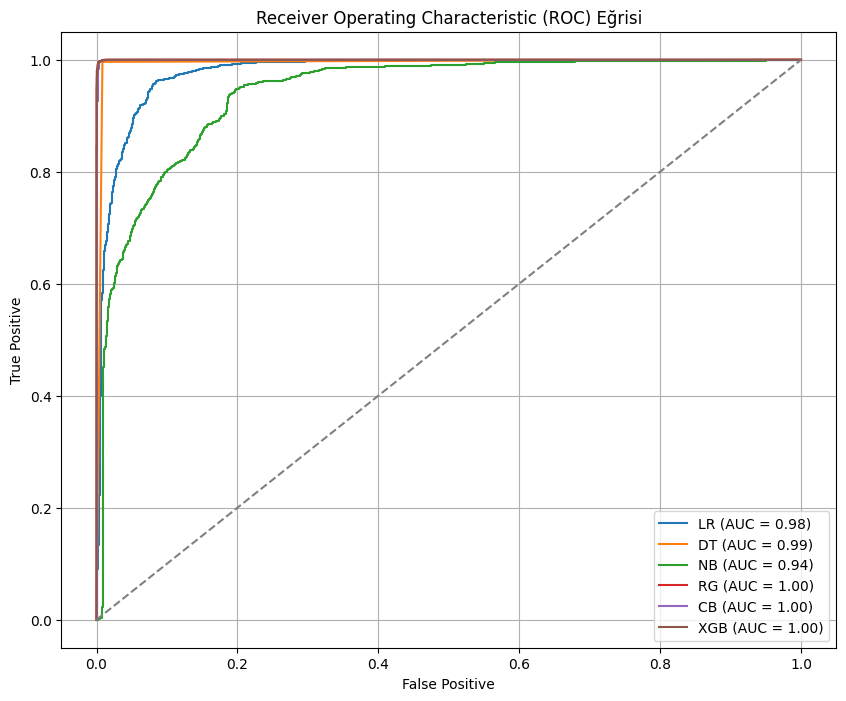

In [38]:
from sklearn.metrics import roc_curve, auc
y_preds = {'LR': LR.predict_proba(x_test)[:,1],
           'DT': dt.predict_proba(x_test)[:,1],
           'NB': NB.predict_proba(x_test)[:,1],
           'RG': rf.predict_proba(x_test)[:,1],
           'CB': CB.predict_proba(x_test)[:,1],
           'XGB': XGB.predict_proba(x_test)[:,1]}


plt.figure(figsize=(10, 8))

for model_name, y_pred in y_preds.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic (ROC) Eğrisi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()